In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [16]:
# напишіть функцію гіпотези лінійної регресії у векторному вигляді
def hipotes_func(w, X):
    h = np.dot(X, w)
    return h

In [3]:
# створіть функцію для обчислення функції втрат у векторному вигляді
def loss_func(w, X, y):
    m = len(y)
    h = hipotes_func(w, X)
    error = h -y
    mse = np.sum(error ** 2) / (2 * m)
    return mse

In [4]:
# реалізуйте один крок градієнтного спуску
def step_gradient(w, X, y, learning_rate):
    m =len(y)
    h = hipotes_func(w, X)
    error = h - y
    gradient = np.dot(X.T, error) / m
    w = w - learning_rate * gradient
    return w

In [5]:
# знайдіть найкращі параметри для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень
df = pd.read_csv("./Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


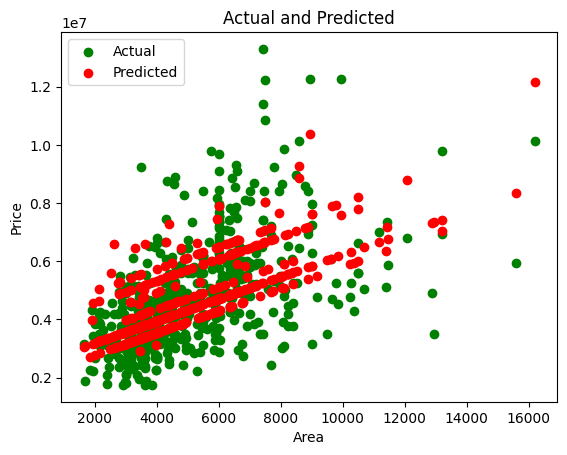

Intercept from sklearn: -173171.61
Coefficients from sklearn: [3.7876000e+02 1.3860495e+06 4.0682003e+05]
MSE: 1791170049977.3193


In [19]:
# знайдіть ці ж параметри за допомогою аналітичного рішення
features = ['area', 'bathrooms', 'bedrooms',]
target = 'price'
X = df[features]
y = df[target]

regressor = LinearRegression()
regressor.fit(X, y)
estimation = regressor.predict(X)

plt.scatter(X['area'], y, color='green', label='Actual')
plt.scatter(X['area'], estimation, color='red', label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Actual and Predicted')
plt.legend()
plt.show()

print(f"Intercept from sklearn: {np.round(regressor.intercept_, 2)}")
print(f"Coefficients from sklearn: {np.round(regressor.coef_, 2)}")

mse = np.round(mean_squared_error(y, estimation), 4)
print(f"MSE: {mse}")

In [11]:
# порівняйте отримані результати
X = np.c_[np.ones(X.shape[0]), X]
w = np.round(np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y), decimals=2)

print(f"Intercept from normal equation: {w[0]}")
print(f"Coefficients from normal equation: {w[1:]}")

Intercept from normal equation: -173171.61
Coefficients from normal equation: [3.7876000e+02 1.3860495e+06 4.0682003e+05]
